<a href="https://colab.research.google.com/github/Marlonsemj/Python/blob/main/01_Econometria_II_Tend%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lise de Tend√™ncia em S√©ries Temporais com Python
-------
> A **tend√™ncia** descreve o comportamento de uma vari√°vel na s√©rie temporal no longo prazo.

**Objetivos b√°sicos na sua identifica√ß√£o:**
- Identificar a tend√™ncia e avaliar o seu comportamento para utiliz√°-lo em previs√µes;
- remov√™-la da s√©rie para facilitar a visualiza√ß√£o das outras componentes.

<center>Y = Œ≤<sub>0</sub> + Œ≤<sub>1</sub>T + Œµ</center>

------
# An√°lise de Tend√™ncia (T)
**H√° dois tipos de tend√™ncia: Determin√≠stica ou Estoc√°stica**

> - **Tend√™ncia determin√≠stica:** S√£o aquelas que ocorrem de maneira previs√≠vel, e por isso, conseguimos prev√™-las.

Para exemplificar, vamos considerar uma s√©rie temporal (Y), e que somente estejam presentes a Tend√™ncia (T) e as varia√ß√µes irregulares, ou erros.

<Center>

`ùíÄ = ùëª + ùú∫`</center>

Na equa√ß√£o acima, Y representa a s√©rie temporal, enquanto **T** representa a **tend√™ncia**, que √© **expressa pelo tempo (t = 0, 1, 2, 3, ..., n)**.


H√° diversas maneiras de extrair a Tend√™ncia Determin√≠stica de uma s√©rie.

## M√©todo de regress√£o (via MQO):
O objetivo √© ajustar o comportamento da s√©rie temporal (Y) em fun√ß√£o da tend√™ncia (tempo: T).

Nesse sentido, a tend√™ncia pode ser descrita de diversas maneiras:

<center>

### ùíÄ = <font color="#696AC9">ùëª</font> + ùú∫</center>

> - ùíÄ = <font color="#696AC9">ùú∑<sub>ùüé</sub> + ùú∑<sub>ùüè</sub> ùëª </font>+ ùú∫ ‚Üí (tend√™ncia linear)
> - ùíÄ = <font color="#696AC9">ùú∑<sub>ùüé</sub> + ùú∑<sub>ùüè</sub>ùëª + ùú∑<sub>ùüè</sub> ùëª<sup>ùüê</sup></font> + ùú∫  ‚Üí  (tend√™ncia quadr√°tica)
> - ùíÄ = <font color="#696AC9">ùú∑<sub>ùüé</sub> ùíÜ<sup>(ùú∑<sub>ùüè</sub> ùëª)</sup></font> ùú∫  ‚Üí  (tend√™ncia exponencial)

Os valores em <font color="#696AC9">roxo</font> na equa√ß√£o acima (ùíÄ¬†ÃÇ ) representam a <font color="#696AC9">tend√™ncia da s√©rie temporal</font>.

- Identificar a tend√™ncia e avaliar o seu comportamento para utiliz√°-lo em previs√µes: (ùíÄ¬†ÃÇ )

- remov√™-la da s√©rie para facilitar a visualiza√ß√£o das outras componentes:
ùíÄ ‚àíùíÄ¬†ÃÇ= ùú∫

           Pa√≠ses  2024 - Valor US$ FOB  2023 - Valor US$ FOB  \
0           China           46306842843           53175757148   
1  Estados Unidos           30695380205           37958896968   
2        Alemanha           10560722401           13147236762   
3       Argentina            9711594052           11997506946   
4          R√∫ssia            8471794040           10012627611   

   2022 - Valor US$ FOB  2021 - Valor US$ FOB  2020 - Valor US$ FOB  \
0           60743964876           47650945510           34778441387   
1           51304351542           39385250785           27875749399   
2           12807743944           11346499464            9369072621   
3           13099925718           11948896309            7897095769   
4            7853002061            5698759353            2747251333   

   2019 - Valor US$ FOB  2018 - Valor US$ FOB  2017 - Valor US$ FOB  \
0           36028297004           35157236888           27553978176   
1           34774253640           3283

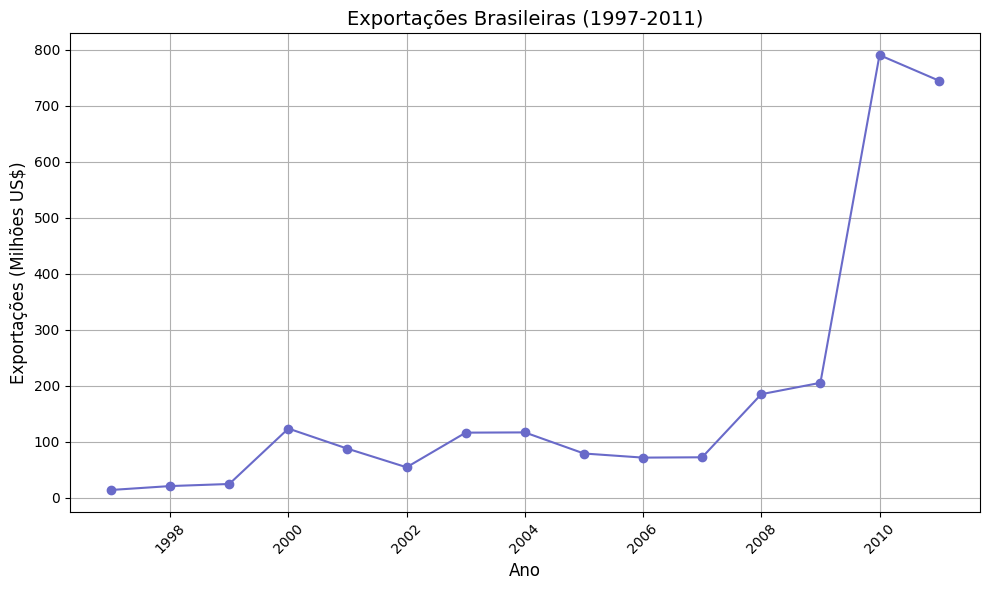

In [13]:
# Importar bibliotecas necess√°rias
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o arquivo XLSX
file_path = '/content/H_IMPORTACAO_GERAL_1997-01_2024-12_DT20241017.xlsx'

# Ler o arquivo XLSX
df = pd.read_excel(file_path)

# Exibir as primeiras linhas do DataFrame para garantir que foi carregado corretamente
print(df.head())

# Filtrar a linha correspondente ao Brasil (ajuste o nome da coluna 'Pa√≠ses' se necess√°rio)
df_brasil = df[df['Pa√≠ses'] == 'Brasil']

# Definir os anos de interesse (1997 a 2011)
anos = list(range(1997, 2012))  # Lista de anos de 1997 a 2011

# Selecionar os valores de exporta√ß√µes do Brasil de 1997 a 2011 e inverter a ordem
valores_exportacoes = df_brasil.iloc[0, -len(anos):].values[::-1]

# Converter os valores de exporta√ß√µes para milh√µes (dividindo por 1 milh√£o)
valores_exportacoes_milhoes = valores_exportacoes / 1_000_000

# Criar um DataFrame com os anos e valores em milh√µes de d√≥lares
df_exportacoes_brasil = pd.DataFrame({
    'Ano': anos,
    'Exporta√ß√µes (milh√µes US$)': valores_exportacoes_milhoes
})

# Definir a coluna 'Ano' como √≠ndice
df_exportacoes_brasil.set_index('Ano', inplace=True)

# Criar o gr√°fico
plt.figure(figsize=(10,6))
plt.plot(df_exportacoes_brasil.index, df_exportacoes_brasil['Exporta√ß√µes (milh√µes US$)'], marker='o', linestyle='-', color='#696AC9')
plt.title('Exporta√ß√µes Brasileiras (1997-2011)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Exporta√ß√µes (Milh√µes US$)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gr√°fico
plt.show()


*FOB - Free on Board: √â um termo de com√©rcio internacional que indica que o vendedor/exportador assume todos os custos e riscos at√© que as mercadorias sejam carregadas no navio para exporta√ß√£o. A partir desse ponto, o comprador/importador √© respons√°vel pelo transporte, seguro e outros custos at√© o destino final.*

In [12]:
# Importar bibliotecas necess√°rias
import pandas as pd
import statsmodels.api as sm

# Caminho para o arquivo XLSX
file_path = '/content/H_IMPORTACAO_GERAL_1997-01_2024-12_DT20241017.xlsx'

# Ler o arquivo XLSX
df = pd.read_excel(file_path)

# Filtrar a linha correspondente ao Brasil (ajuste o nome da coluna 'Pa√≠ses' se necess√°rio)
df_brasil = df[df['Pa√≠ses'] == 'Brasil']

# Definir os anos de interesse (1997 a 2011)
anos = list(range(1997, 2012))  # Lista de anos de 1997 a 2011

# Selecionar os valores de exporta√ß√µes do Brasil de 1997 a 2011 e inverter a ordem
valores_exportacoes = df_brasil.iloc[0, -len(anos):].values[::-1]

# Criar um DataFrame com os anos e valores em d√≥lares
df_exportacoes_brasil = pd.DataFrame({
    'Ano': anos,
    'Exporta√ß√µes (US$)': valores_exportacoes
})

# Verificar e converter os tipos de dados
df_exportacoes_brasil['Exporta√ß√µes (US$)'] = pd.to_numeric(df_exportacoes_brasil['Exporta√ß√µes (US$)'], errors='coerce')

# Remover entradas com valores NaN
df_exportacoes_brasil = df_exportacoes_brasil.dropna()

# Definir a vari√°vel dependente (y) e a vari√°vel independente (X)
X = df_exportacoes_brasil['Ano']  # Vari√°vel independente (anos)
y = df_exportacoes_brasil['Exporta√ß√µes (US$)']  # Vari√°vel dependente (exporta√ß√µes)

# Adicionar uma constante ao modelo (necess√°rio para a intercepta√ß√£o)
X = sm.add_constant(X)

# Ajustar o modelo de regress√£o OLS (MQO)
modelo = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:      Exporta√ß√µes (US$)   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     13.00
Date:                Fri, 18 Oct 2024   Prob (F-statistic):            0.00320
Time:                        01:42:06   Log-Likelihood:                -305.30
No. Observations:                  15   AIC:                             614.6
Df Residuals:                      13   BIC:                             616.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.732e+10   2.15e+10     -3.597      0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


Modelo linearizado √© dado por:
- ùíÄ = <font color="#696AC9">ùú∑<sub>ùüé</sub> ùíÜ<sup>(ùú∑<sub>ùüè</sub> ùëª)</sup></font> ùú∫  ‚Üí  (tend√™ncia exponencial)


<center>
ùíçùíèùíÄ = <font color="#696AC9">ùíçùíèùú∑<sub>ùüé</sub> + ùú∑<sub>1</sub> ùëª</font> + ùíçùíèùú∫ </center>


Os par√¢metros estimados no modelo exponencial n√£o possuem interpreta√ß√£o direta.

Deve-se calcular o antilogaritmo para obter os coeficientes corretamente.



Quando voc√™ tem um modelo de regress√£o exponencial, a rela√ß√£o entre as vari√°veis √© expressa como \(y = ae^{bx}\), onde \(a\) e \(b\) s√£o os coeficientes que voc√™ estima. Para obter a interpreta√ß√£o correta dos coeficientes em uma regress√£o exponencial, voc√™ deve calcular o antilogaritmo (exponencial) do intercepto e considerar a transforma√ß√£o da vari√°vel dependente.

### Ajuste do Modelo Exponencial

1. Transforme a vari√°vel dependente aplicando o logaritmo natural.
2. Realize a regress√£o linear nos dados transformados.
3. Calcule o antilogaritmo do intercepto ap√≥s ajustar o modelo.

Aqui est√° o c√≥digo para realizar esses passos:

In [14]:
# Importar bibliotecas necess√°rias
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Caminho para o arquivo XLSX
file_path = '/content/H_IMPORTACAO_GERAL_1997-01_2024-12_DT20241017.xlsx'

# Ler o arquivo XLSX
df = pd.read_excel(file_path)

# Filtrar a linha correspondente ao Brasil (ajuste o nome da coluna 'Pa√≠ses' se necess√°rio)
df_brasil = df[df['Pa√≠ses'] == 'Brasil']

# Definir os anos de interesse (1997 a 2011)
anos = list(range(1997, 2012))  # Lista de anos de 1997 a 2011

# Selecionar os valores de exporta√ß√µes do Brasil de 1997 a 2011 e inverter a ordem
valores_exportacoes = df_brasil.iloc[0, -len(anos):].values[::-1]

# Criar um DataFrame com os anos e valores em d√≥lares
df_exportacoes_brasil = pd.DataFrame({
    'Ano': anos,
    'Exporta√ß√µes (US$)': valores_exportacoes
})

# Verificar e converter os tipos de dados
df_exportacoes_brasil['Exporta√ß√µes (US$)'] = pd.to_numeric(df_exportacoes_brasil['Exporta√ß√µes (US$)'], errors='coerce')

# Remover entradas com valores NaN
df_exportacoes_brasil = df_exportacoes_brasil.dropna()

# Transformar a vari√°vel dependente (log das exporta√ß√µes)
df_exportacoes_brasil['log_Exporta√ß√µes'] = np.log(df_exportacoes_brasil['Exporta√ß√µes (US$)'])

# Definir a vari√°vel dependente (y) e a vari√°vel independente (X)
X = df_exportacoes_brasil['Ano']  # Vari√°vel independente (anos)
y = df_exportacoes_brasil['log_Exporta√ß√µes']  # Vari√°vel dependente transformada

# Adicionar uma constante ao modelo (necess√°rio para a intercepta√ß√£o)
X = sm.add_constant(X)

# Ajustar o modelo de regress√£o OLS (MQO) no logaritmo das exporta√ß√µes
modelo = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(modelo.summary())

# Calcular os coeficientes em termos de exporta√ß√µes
intercepto = modelo.params['const']
coef_ano = modelo.params['Ano']

# Calcular o antilogaritmo para o intercepto
a = np.exp(intercepto)  # Valor do intercepto em termos de exporta√ß√µes
b = coef_ano  # Coeficiente da vari√°vel Ano

# Exibir os resultados
print(f"Intercepto (a): {a}")
print(f"Coeficiente do Ano (b): {b}")


                            OLS Regression Results                            
Dep. Variable:        log_Exporta√ß√µes   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     37.00
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           3.89e-05
Time:                        01:53:36   Log-Likelihood:                -12.618
No. Observations:                  15   AIC:                             29.24
Df Residuals:                      13   BIC:                             30.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -420.7157     72.189     -5.828      0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


### Explica√ß√£o do C√≥digo:

1. **Transforma√ß√£o Logar√≠tmica:** O valor das exporta√ß√µes √© transformado usando `np.log()`.
2. **Ajuste do Modelo:** A regress√£o √© realizada sobre a vari√°vel logar√≠tmica.
3. **C√°lculo do Antilogaritmo:** O antilogaritmo do intercepto √© calculado usando `np.exp()`, que fornece uma interpreta√ß√£o direta em termos de exporta√ß√µes.

### Interpreta√ß√£o:
- O intercepto \(a\) representa o n√≠vel de exporta√ß√µes quando o ano √© zero (n√£o aplic√°vel diretamente, mas pode ser interpretado como uma base para a an√°lise).
- O coeficiente \(b\) representa a varia√ß√£o percentual nas exporta√ß√µes para cada incremento de um ano, expresso em logaritmos.

Voc√™ pode executar esse c√≥digo no Google Colab, e ele ir√° fornecer os coeficientes corretamente ajustados para o modelo exponencial.

### Interpreta√ß√£o da Regress√£o:
Aqui est√° uma interpreta√ß√£o resumida dos resultados da regress√£o OLS aplicada √† transforma√ß√£o logar√≠tmica das exporta√ß√µes brasileiras:

### Resultados da Regress√£o

- **Vari√°vel Dependente:** log_Exporta√ß√µes
- **N√∫mero de Observa√ß√µes:** 15

### Estat√≠sticas do Modelo

- **R-squared (R¬≤):** 0.740  
  Aproximadamente 74% da varia√ß√£o nas exporta√ß√µes (em termos logar√≠tmicos) √© explicada pelo modelo, o que indica um bom ajuste.

- **Adj. R-squared:** 0.720  
  O valor ajustado para o R¬≤, que leva em conta o n√∫mero de vari√°veis independentes, tamb√©m sugere que o modelo √© robusto.

- **F-statistic:** 37.00  
  Este valor alto indica que o modelo √© significativo e que as vari√°veis explicativas t√™m um impacto significativo sobre a vari√°vel dependente.

- **Prob (F-statistic):** 3.89e-05  
  Um valor muito baixo, indicando que podemos rejeitar a hip√≥tese nula de que todos os coeficientes s√£o iguais a zero.

### Coeficientes

- **Intercepto (const):** -420.7157  
  Este coeficiente representa o logaritmo das exporta√ß√µes quando o ano √© zero, mas sua interpreta√ß√£o pr√°tica n√£o √© relevante. A grande magnitude e o valor negativo sugerem que, sem uma interpreta√ß√£o direta, esse n√∫mero pode indicar um ponto fora do alcance pr√°tico.

- **Coeficiente do Ano (Ano):** 0.2191  
  Este coeficiente significa que, para cada aumento de um ano, espera-se que as exporta√ß√µes aumentem em aproximadamente 21.91% (quando consideramos a transforma√ß√£o logar√≠tmica).

### Erros Padr√£o e Teste de Signific√¢ncia

- **Erro Padr√£o do Coeficiente do Ano:** 0.036  
  O erro padr√£o relativamente baixo sugere que a estimativa do coeficiente √© confi√°vel.

- **Valor p:** 0.000  
  Isso indica que o coeficiente do ano √© estatisticamente significativo, permitindo-nos concluir que h√° uma rela√ß√£o positiva entre o tempo e as exporta√ß√µes.

### Diagn√≥stico do Modelo

- **Durbin-Watson:** 1.165  
  Um valor abaixo de 2 sugere a possibilidade de autocorrela√ß√£o nos res√≠duos, o que pode ser uma preocupa√ß√£o.

- **Condition Number:** 9.30e+05  
  Um n√∫mero de condi√ß√£o elevado pode indicar problemas de multicolinearidade ou instabilidade num√©rica.

### Conclus√£o

Os resultados da regress√£o logar√≠tmica indicam uma rela√ß√£o positiva significativa entre o tempo e as exporta√ß√µes brasileiras, com um aumento percentual consider√°vel a cada ano. Apesar do bom ajuste do modelo, a interpreta√ß√£o do intercepto n√£o √© pr√°tica, e h√° preocupa√ß√µes com a autocorrela√ß√£o e a condi√ß√£o num√©rica, que devem ser consideradas em an√°lises futuras.

Fonte dos dados: https://comexstat.mdic.gov.br/pt/geral

Uma abordagem amplamente utilizada para a identifica√ß√£o de tend√™ncias √© o teste *Mann-Kendall*. Esse teste n√£o param√©trico oferece uma maneira objetiva de detectar tend√™ncias em s√©ries temporais, sem fazer suposi√ß√µes sobre a distribui√ß√£o dos dados. Os testes geralmente consideram um n√≠vel de signific√¢ncia de 5%.

*Abaixo est√° um exemplo de como o teste Mann-Kendall pode ser implementado em Python:*

In [4]:
# Instalando a biblioteca do Python - Em Python h√° apenas a biblioteca pymannkendall, mas √© uma biblioteca bastante extensa e com mais testes de tend√™ncia.

# Instalar o pacote pymannkendall
!pip install pymannkendall

# Importar o pacote e realizar o teste Mann-Kendall
import numpy as np
import pandas as pd
import pymannkendall as mk

# Simula√ß√£o de dados de vendas de varejo
dados_vendas = [150, 160, 165, 180, 190, 200, 210, 230, 250, 270]

# Aplica√ß√£o do teste Mann-Kendall
resultado = mk.original_test(dados_vendas)

# Exibi√ß√£o dos resultados
print(f'Resultado do teste: {resultado}')


Resultado do teste: Mann_Kendall_Test(trend='increasing', h=True, p=8.303070332638107e-05, z=3.9354796403996297, Tau=1.0, s=45.0, var_s=125.0, slope=12.5, intercept=138.75)


Os resultados do teste Mann-Kendall mostram o comportamento da tend√™ncia de uma s√©rie temporal e s√£o interpretados da seguinte forma:

- **`trend='increasing'`**: A s√©rie apresenta uma tend√™ncia **crescente**. Isso significa que, ao longo do tempo, os valores da s√©rie est√£o aumentando.
  
- **`h=True`**: O valor `True` indica que, ao n√≠vel de signific√¢ncia de 5% (ou outro previamente configurado), h√° **evid√™ncias suficientes** para rejeitar a hip√≥tese nula de que **n√£o h√° tend√™ncia** na s√©rie. Ou seja, existe uma tend√™ncia estatisticamente significativa.

- **`p=8.303070332638107e-05`**: Este √© o valor **p** (probabilidade associada ao teste). Um valor muito baixo (neste caso, 0.000083) indica que √© altamente improv√°vel que a tend√™ncia observada tenha ocorrido por acaso, confirmando que a tend√™ncia crescente √© significativa.

- **`z=3.9354796403996297`**: O valor **z** √© a estat√≠stica do teste z, que mede quantos desvios-padr√£o o valor observado est√° longe da hip√≥tese nula (tend√™ncia inexistente). Valores elevados de z (positivos neste caso) indicam uma tend√™ncia positiva (crescente).

- **`Tau=1.0`**: Este √© o coeficiente de Kendall's Tau, que mede a for√ßa da tend√™ncia. O valor 1.0 indica uma correla√ß√£o perfeita positiva, ou seja, todos os pares de pontos temporais da s√©rie apresentam um padr√£o de crescimento.

- **`s=45.0`**: Este valor √© a soma das diferen√ßas entre os pares de dados (estat√≠stica S), usada para calcular a tend√™ncia.

- **`var_s=125.0`**: Este valor representa a vari√¢ncia da estat√≠stica S, usada para calcular a estat√≠stica z.

- **`slope=12.5`**: A inclina√ß√£o estimada da tend√™ncia linear. Neste caso, a inclina√ß√£o de 12.5 significa que, em m√©dia, a s√©rie est√° aumentando 12.5 unidades por per√≠odo.

- **`intercept=138.75`**: Este valor representa o intercepto da linha de tend√™ncia estimada. Quando o tempo √© 0, o valor da s√©rie seria 138.75.

**Conclus√£o:**
Os resultados indicam que a s√©rie temporal apresenta uma **tend√™ncia crescente significativa**. A probabilidade de essa tend√™ncia ser um evento aleat√≥rio √© extremamente baixa (p-valor pr√≥ximo de 0), e a tend√™ncia √© forte, com uma inclina√ß√£o de 12.5 por per√≠odo. Isso sugere que o comportamento de crescimento nas vendas (ou na vari√°vel analisada) √© consistente e estatisticamente robusto.

-----
### Vamos replicar para os dados de Importa√ß√µes do Brasil

In [15]:
# Instalar o pacote pymannkendall (caso necess√°rio)
!pip install pymannkendall

# Importar as bibliotecas necess√°rias
import pandas as pd
import pymannkendall as mk

# Caminho para o arquivo XLSX
file_path = '/content/H_IMPORTACAO_GERAL_1997-01_2024-12_DT20241017.xlsx'

# Ler o arquivo XLSX
df = pd.read_excel(file_path)

# Filtrar a linha correspondente ao Brasil (ajuste o nome da coluna 'Pa√≠ses' se necess√°rio)
df_brasil = df[df['Pa√≠ses'] == 'Brasil']

# Definir os anos de interesse (1997 a 2011)
anos = list(range(1997, 2012))  # Lista de anos de 1997 a 2011

# Selecionar os valores de exporta√ß√µes do Brasil de 1997 a 2011 e inverter a ordem
valores_exportacoes = df_brasil.iloc[0, -len(anos):].values[::-1]

# Aplicar o teste Mann-Kendall nos valores reais de exporta√ß√£o
resultado = mk.original_test(valores_exportacoes)

# Exibir os resultados do teste
print(f'Resultado do teste: {resultado}')


Resultado do teste: Mann_Kendall_Test(trend='increasing', h=True, p=0.0015392574185091323, z=3.1671786195545186, Tau=0.6190476190476191, s=65.0, var_s=408.3333333333333, slope=16394030.9, intercept=-27055585.299999997)


In [17]:
from IPython.display import display, HTML

# Criar uma tabela HTML estilizada com o resumo da interpreta√ß√£o
html = """
<table style="width:60%; margin: 0 auto; border: 2px solid #696AC9; border-collapse: collapse; font-family: Arial, sans-serif;">
  <tr style="background-color: #696AC9; color: white; text-align: center;">
    <th colspan="2" style="padding: 10px;">Interpreta√ß√£o do Teste Mann-Kendall</th>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="padding: 10px; font-weight: bold;">Tend√™ncia:</td>
    <td style="padding: 10px;">Aumentando</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="padding: 10px; font-weight: bold;">p-valor:</td>
    <td style="padding: 10px;">0.0015 (Significativo)</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="padding: 10px; font-weight: bold;">Coeficiente Tau:</td>
    <td style="padding: 10px;">0.62 (Correla√ß√£o positiva)</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="padding: 10px; font-weight: bold;">Taxa de Crescimento (Slope):</td>
    <td style="padding: 10px;">16.39 milh√µes/ano</td>
  </tr>
</table>
"""

# Exibir a tabela no Google Colab
display(HTML(html))


A partir dos dados interpretados no teste de Mann-Kendall, voc√™ pode destacar os seguintes pontos:

1. **Tend√™ncia de Crescimento nas Exporta√ß√µes:**
   Os resultados indicam uma tend√™ncia **significativa de aumento** nas exporta√ß√µes do Brasil ao longo dos anos analisados. Essa conclus√£o √© refor√ßada pelo p-valor muito baixo (0.0015), indicando que a probabilidade dessa tend√™ncia ter ocorrido por acaso √© extremamente baixa.

2. **For√ßa da Tend√™ncia:**
   O coeficiente **Tau** de 0.62 aponta uma **correla√ß√£o positiva forte**, o que significa que existe uma rela√ß√£o consistente entre o tempo e o aumento das exporta√ß√µes.

3. **Taxa de Crescimento:**
   Com uma **taxa de crescimento anual (slope)** de aproximadamente 16.39 milh√µes de d√≥lares, √© poss√≠vel dizer que, em m√©dia, as exporta√ß√µes aumentaram nessa propor√ß√£o a cada ano durante o per√≠odo analisado.

4. **Significado Econ√¥mico:**
   Essa tend√™ncia de aumento nas exporta√ß√µes sugere uma melhoria cont√≠nua no com√©rcio internacional do Brasil nesse per√≠odo, o que pode ser associado a fatores como maior competitividade, acordos comerciais, ou crescimento da demanda global por produtos brasileiros.

Com isso, pode-se concluir que o Brasil apresentou uma **forte e significativa expans√£o de suas exporta√ß√µes** no per√≠odo, o que √© um dado relevante para entender a din√¢mica econ√¥mica do pa√≠s nesse intervalo de tempo.